# Project for Programming in the Humanities
## Prediciting Utilisation of Mental Health Treatment for workers in the technology industry
Student: Emily Seitz,
Teacher: Dr. Benedikt Perak,
Summersemester 2022, 06.06.2022

10.7% of the global population suffer from a mental disorder (source: https://ourworldindata.org/mental-health). Mental health includes our emotional, psychological and social well-being and affects a variety of components of every day life, for example how we feel, think and act. The workplace also plays a crucial role here. Not only do we spend a lot of time working, but work can also be a high stress factor. Work can therefore be a breeding ground for mental health disorders if there is a lot of stress, pressure or a bad working atmosphere. Especially the technology industry is fast paced with a rigorous work culture that demands high levels of productivity and is known for late nights, tight deadlines and having to be available at all times. According to this survey (https://osmi.typeform.com/report/Ao6BTw/U76z) 51,3% of tech workers have been diagnosed with a mental health condition. That is why it is very important to draw attention to this topic, which still isn't discussed properly. Employers need to provide support and create an environment where mental health problems can and should be openly communicated. Fortunately, Mental Health Disorders are treatable and it is important for individuals to accept and seek help from professionals.
I will work with the above dataset from the survey, explore and display the data and use machine learning to predict whether a person has sought treatment or not.
The results could, in the long run and with more data, create insight into what factors may be inhibiting and promoting the use of treatment.


In [1015]:
# to work with the data
import numpy as np
import pandas as pd

# for vizualisation
import matplotlib.pyplot as plt

# for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# to make the predictions
import tensorflow as tf

In [1016]:
data = pd.read_csv('data/survey.csv')

In [1017]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Abouth the data

- Timestamp
- Age
- Gender
- Country
- state: If you live in the United States, which state or territory do you live in?
- self_employed: Are you self-employed?
- family_history: Do you have a family history of mental illness?
- treatment: Have you sought treatment for a mental health condition?
- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
- no_employees: How many employees does your company or organization have?
- remote_work: Do you work remotely (outside of an office) at least 50% of the time?
- tech_company: Is your employer primarily a tech company/organization?
- benefits: Does your employer provide mental health benefits?
- care_options: Do you know the options for mental health care your employer provides?
- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- leave: How easy is it for you to take medical leave for a mental health condition?
- mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
- physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
- coworkers: Would you be willing to discuss a mental health issue with your coworkers?
- physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
- mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- comments: Any additional notes or comments

# Cleaning the data


In [1018]:

#get a sense of how many missing values there are
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [1019]:
# get rid of column "comments" since there are too many missing values
data = data.drop('comments', axis=1)

In [1020]:
# drop all rows where "self_employed" is filled with NaN
data = data[data['self_employed'].notna()]

In [1021]:
# drop colum "state" since it is only filled for United States and not for United Kingdom
data = data.drop('state', axis=1)

In [1022]:
# check what values are in column "work_interfere"
data['work_interfere'].unique()


array(['Sometimes', nan, 'Never', 'Often', 'Rarely'], dtype=object)

In [1023]:
# fill NaNs with "unknown"
data['work_interfere'] = data['work_interfere'].fillna('Unknown')

###  Column Age

Since some participants gave obvious false answers to the question "What is your age?", I decided to remove every row where the age  is under 18 or above 80, because it is really unlikely to work in Tech being that young or that old. Giving obvious wrong answers to this question makes the participant not trustworthy and their answers are removed from the data.

In [1024]:
(data['Age'].unique())

array([         46,          36,          29,          31,          41,
                33,          35,          34,          37,          32,
                30,          42,          40,          27,          38,
                50,          24,          18,          28,          26,
                22,          44,          23,          19,          25,
                39,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [1025]:

# dropping rows with participants under 18 and over 80
data.drop(data[ (data['Age'] < 18) ].index , inplace=True)
data.drop(data[ (data['Age'] > 80) ].index , inplace=True)

In [1026]:
data['Age'].unique()

array([46, 36, 29, 31, 41, 33, 35, 34, 37, 32, 30, 42, 40, 27, 38, 50, 24,
       18, 28, 26, 22, 44, 23, 19, 25, 39, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

# Creating new useful columns

The column "Timestamp" seems rather useless. First we will create 4 new columns out of this Year, Month, Day and Hour, to generate more data, after that column Timestamp is dropped.

In [1027]:
# using the column "Timestamp" to create 3 new columns "Year", "Month" and "day" that might be useful
data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
data['Month'] = data['Timestamp'].apply(lambda x: np.int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: np.int(x[8:10]))

# additionaly creating a column "Hour" to see if it makes a difference at what time of the day people fill out the survey
data['Hour'] = data['Timestamp'].apply(lambda x: np.int(x[11:13]))

# dropping column "timestamp" since it is no longer useful
data = data.drop('Timestamp', axis = 1)

# Deal with open answers (encoding features)

In [1028]:
# getting a sense of how the data, to be more precise: to see how many unique answers are per column
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 46,
 'Country': 46,
 'self_employed': 2,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 5,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

### Column "Gender"

For column "Gender" participants were able to answer as a free text response. Therefore there were many different answers. The following lines takes the answers and transform them in three different numerical values (0,1,2) for male, female and others.

In [1029]:
# different values for "gender"
list(data['Gender'].unique())

['male',
 'Male',
 'Female',
 'female',
 'M',
 'm',
 'Male-ish',
 'maile',
 'Trans-female',
 'Cis Female',
 'F',
 'something kinda male?',
 'Cis Male',
 'Woman',
 'f',
 'Mal',
 'Male (CIS)',
 'queer/she/they',
 'non-binary',
 'Femake',
 'woman',
 'Make',
 'Nah',
 'Enby',
 'fluid',
 'Genderqueer',
 'Female ',
 'Androgyne',
 'Agender',
 'cis-female/femme',
 'Guy (-ish) ^_^',
 'male leaning androgynous',
 'Male ',
 'Man',
 'Trans woman',
 'msle',
 'Neuter',
 'Female (trans)',
 'queer',
 'Female (cis)',
 'Mail',
 'cis male',
 'Malr',
 'femail',
 'Cis Man',
 'ostensibly male, unsure what that really means']

In [1030]:

def rewrite_gender(gender):
    # function that rewrites the different answers for "gender" and trandformes them to a numerical feature
    if gender.lower()[0] == 'm' :
        return 0
    elif gender.lower()[0] == 's':
        return 0
    elif gender.lower()[0] == 'o':
        return 0
    elif gender == 'Cis Male':
        return 0
    elif gender == 'Cis Man':
        return 0
    elif gender.lower()[0] == 'f':
        return 1
    elif gender.lower()[0] == 'w':
        return 1
    elif gender == 'Cis Female':
       return 1
    else:
        return 2

In [1031]:
# applying function "rewrite gender" to column "Gender"
data['Gender'] = data['Gender'].apply(rewrite_gender)

In [1032]:
list(data['Gender'].unique())

[0, 1, 2]

## Transforming values into numerical values

In order to work with the data, I will now fransfer every value in a numerical value. For that we split the columns into binary, ordinal and nominal features. Binary feature means that there were only two options to answer (Yes and No). Ordinal means that the variables have ordered categories, for example fot the number of employees there were five different options to answer and the answers were ordered from little to big. The third categorie are nominal features, here the categories are labeled without any specific order of preference. After categorizing the features, I used three different functions which according to the type of feature, transformes the values in numerical values.

In [1033]:
binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence',
    'treatment'
]

ordinal_features = [
   'work_interfere',
    'no_employees'
]

nominal_features = [
    'Country',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]



In [1034]:
def binary_encode(dataframe, columns, positive_values):
    dataframe = dataframe.copy()
    for column, positive_value in zip(columns, positive_values):
        dataframe[column] = dataframe[column].apply(lambda x: 1 if x == positive_value else 0)
    return dataframe

def ordinal_encode(dataframe, columns, orderings):
    dataframe = dataframe.copy()
    for column, ordering in zip(columns, orderings):
        dataframe[column] = dataframe[column].apply(lambda x: ordering.index(x))
    return dataframe

def onehot_encode(dataframe, columns, prefixes):
    dataframe = dataframe.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(dataframe[column], prefix)
        dataframe = pd.concat([dataframe, dummies], axis=1)
        dataframe = dataframe.drop(column, axis=1)
    return dataframe

In [1035]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values= ['Yes' for feature in binary_features]
)

data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=[
    # of work_interfere
    ['Never', 'Rarely', 'Sometimes', 'Often', 'Unknown'],
    # of no_employees
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]
)

data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=[
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]
)

In [1036]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,ph_Yes,cw_Maybe,cw_No,cw_Yes,su_Maybe,su_No,su_Yes,mi_Don't know,mi_No,mi_Yes
18,46,0,1,1,0,2,0,1,1,1,...,1,0,1,0,0,0,1,0,0,1
19,36,0,1,1,0,4,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
20,29,0,0,1,1,2,3,0,1,0,...,0,0,1,0,0,1,0,0,1,0
21,31,0,1,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
22,46,0,0,0,1,3,2,1,1,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,0,0,0,1,4,2,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1255,32,0,0,1,1,3,2,1,1,0,...,1,0,1,0,0,1,0,0,0,1
1256,34,0,0,1,1,2,5,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1257,46,1,0,0,0,4,3,1,1,0,...,0,0,1,0,0,1,0,0,1,0


# Splitting and Scaling

Since we want the algorithm to predict the Treatment column, we have to seperate it from the dataset. Standart Scaler is used in order to standardize the range of functionality of the input dataset.
The function fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model will learn the mean and variance of the features of the training set. These learned parameters are then used to scale the test data.

In [1037]:
y = data['treatment'].copy()
X = data.drop('treatment', axis=1).copy()

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Training

I am using tensorflow and start by building a keras model. The input layer has the shape of the amount of features. I use two connected hidden layers with each 2000 neurons with a relu activation function. The rectified linear activation function is a piecewise linear function that will output the input directly if it is positive, otherwise it will output zero. The output layer will return one activation and a sigmoid activation function, so the value will be a estimate between 0 and 1 of a prediction for how likely it is that the individual sought up treatment.

In [1038]:
# input layer
inputs = tf.keras.Input(shape=(X.shape[1]))
# hidden layers
x = tf.keras.layers.Dense(2000, activation='relu')(inputs)
x = tf.keras.layers.Dense(2000, activation='relu')(x)
# output layer, using sigmoid function since output values are binary
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics =[
        'accuracy'
    ]
)


epochs = 8


history = model.fit(
    X_train,
    y_train,
    # use 20% of training data for validation
    validation_split = 0.2,
    batch_size = X.shape[1],
    epochs = epochs,
    callbacks=[
        # when the validation loss is no longer improving after a certain number of epochs, it will lower the learning rate to allow the model to converge
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/8
7/7 [==============================] - 1s 48ms/step - loss: 0.8899 - accuracy: 0.5768 - val_loss: 0.5263 - val_accuracy: 0.7225
Epoch 2/8
7/7 [==============================] - 0s 42ms/step - loss: 0.5343 - accuracy: 0.7391 - val_loss: 0.5365 - val_accuracy: 0.7399
Epoch 3/8
7/7 [==============================] - 0s 26ms/step - loss: 0.4530 - accuracy: 0.7957 - val_loss: 0.5339 - val_accuracy: 0.7283
Epoch 4/8
7/7 [==============================] - 0s 30ms/step - loss: 0.3894 - accuracy: 0.8290 - val_loss: 0.5636 - val_accuracy: 0.7283
Epoch 5/8
7/7 [==============================] - 0s 53ms/step - loss: 0.3332 - accuracy: 0.8449 - val_loss: 0.5863 - val_accuracy: 0.7168
Epoch 6/8
7/7 [==============================] - 0s 43ms/step - loss: 0.2721 - accuracy: 0.8913 - val_loss: 0.6020 - val_accuracy: 0.7225
Epoch 7/8
7/7 [==============================] - 0s 30ms/step - loss: 0.2147 - accuracy: 0.9319 - val_loss: 0.6257 - val_accuracy: 0.7225
Epoch 8/8
7/7 [===================

# Results

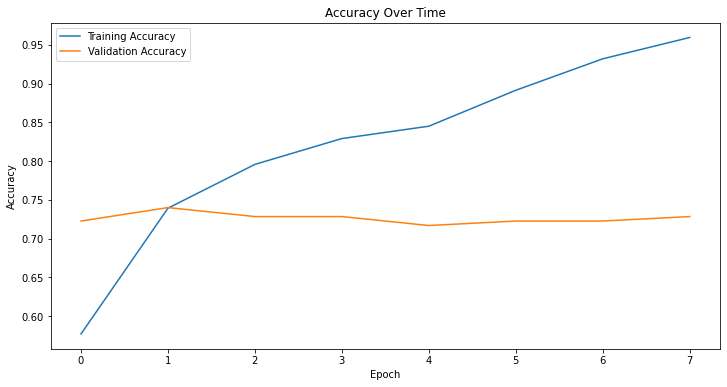

In [1039]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

### Run model on test data

In [1040]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 7ms/step - loss: 0.9172 - accuracy: 0.6946


[0.9171860218048096, 0.6945946216583252]

The average accuracy on the test data comes down to around 68%. This means the model is to 68% correct in predicting if someone sought up treatment for their menatal health, based on the answers to the questions of the survey. This is alright, especially with the knowledge that predicting if an individual sought up treatment, is probably dependent on a wider range of factors than just those asked in a survey.